In [104]:
!ls

aggression_annotated_comments.tsv   sample_data
aggression_annotations.tsv	    table1-01.xls
aggression_worker_demographics.tsv  toxicity_annotated_comments.tsv
gdrive				    toxicity_annotations.tsv
images				    toxicity_worker_demographics.tsv


I am choosing to analyze the Toxicity and Aggression data. I want to investigate the behavior and makeup of the labellers and pinpoint general trends. This is an exploratory analysis and thus I do not have any hypotheses related to the data at this time.

Importing the datasets through Pandas and loading the required libraries.

In [62]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

t_worker = pd.read_csv('toxicity_worker_demographics.tsv', sep ='\t')
t_annots = pd.read_csv('toxicity_annotations.tsv', sep ='\t')
t_comment = pd.read_csv('toxicity_annotated_comments.tsv', sep ='\t')

a_worker = pd.read_csv('aggression_worker_demographics.tsv', sep='\t')
a_annots = pd.read_csv('aggression_annotations.tsv', sep='\t') 
a_comment = pd.read_csv('aggression_annotated_comments.tsv', sep='\t')

Investigating the shapes of these data, the columns present before merging them on relevant fields so we are working with one dataset instead of multiple.

In [5]:
print("Worker demographics columns: {}".format(list(t_worker.columns)))
print("\n"*2)
print("Annotations columns: {}".format(list(t_annots.columns)))
print("\n"*2)
print("Comment columns: {}".format(list(t_comment.columns)))


Worker demographics columns: ['worker_id', 'gender', 'english_first_language', 'age_group', 'education']



Annotations columns: ['rev_id', 'worker_id', 'toxicity', 'toxicity_score']



Comment columns: ['rev_id', 'comment', 'year', 'logged_in', 'ns', 'sample', 'split']


In [6]:
t_w_a = t_annots.merge(t_worker, how='inner', on='worker_id')
t_w_a_c = t_comment.merge(t_w_a, how='inner', on='rev_id')

In [7]:
print("Worker demographics shape: {}, Worker demographics individual workers: {} \n"\
      .format(t_worker.shape, t_worker['worker_id'].nunique()))

print("Annotations shape: {}, Annotations individual workers: {} \n"\
      .format(t_annots.shape, t_annots['worker_id'].nunique()))

print("Worker-Annotations shape: {}, Worker-annotations individual workers: {} \n"\
      .format(t_w_a.shape, t_w_a['worker_id'].nunique()))

print("Worker-Annotations-comments shape: {}, Worker-annotations-comments individual workers: {}"\
      .format(t_w_a_c.shape, t_w_a_c['worker_id'].nunique()))

Worker demographics shape: (3591, 5), Worker demographics individual workers: 3591 

Annotations shape: (336334, 4), Annotations individual workers: 4293 

Worker-Annotations shape: (283254, 8), Worker-annotations individual workers: 3583 

Worker-Annotations-comments shape: (135925, 14), Worker-annotations-comments individual workers: 3570


Creating final aggression and toxicity datasets.

In [8]:
toxic = t_w_a_c.copy()

In [9]:
a_w_a = a_annots.merge(a_worker, how='inner', on='worker_id')
a_w_a_c = a_comment.merge(a_w_a, how='inner', on='rev_id')
aggression = a_w_a_c.copy()

# Section 1: Analyzing worker demographics for both toxicity and aggression datasets

It is important to understand the distribution of worker demographics. For example, how many women vs men labelers? How many with a bachelors and how many not? These questions are important as they help us analyze the distribution of this dataset. 


In [10]:
plt.style.use('seaborn-darkgrid')

def plot_frequency(data, column, color):
  """
  Function to plot the frequency as percentage of each category 
  as a barchart.
  """
  fig, ax = plt.subplots()
  ax = data[col].value_counts().plot(kind='barh', figsize=(10,7),
                                        color=color, fontsize=13);
  ax.set_alpha(0.8)
  ax.set_title("Percentage breakdown of {} column".format(column), fontsize=18)
  ax.set_xlabel("Percentage of category", fontsize=18);
  ax.set_xticks([0, 5, 10, 15, 20])

  # create a list to collect the plt.patches data
  totals = []

  # find the values and append to list
  for i in ax.patches:
      totals.append(i.get_width())

  # set individual bar lables using above list
  total = sum(totals)

  # set individual bar lables using above list
  for i in ax.patches:
      # get_width pulls left or right; get_y pushes up or down
      ax.text(i.get_width()+.3, i.get_y()+.38, \
              str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
  color='dimgrey')

  # invert for largest on top 
  ax.invert_yaxis()
  print("\n"*4)



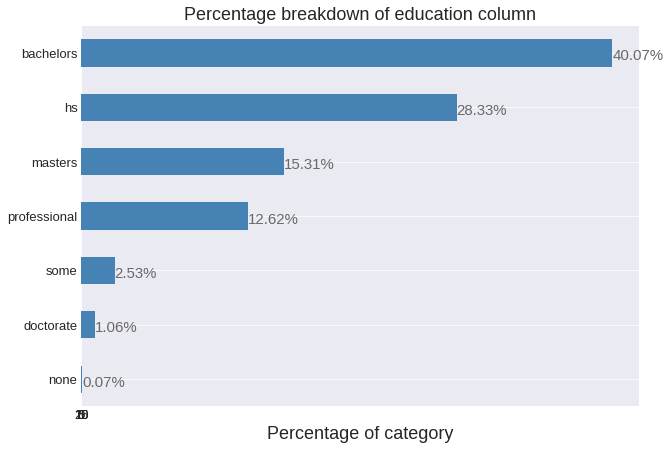

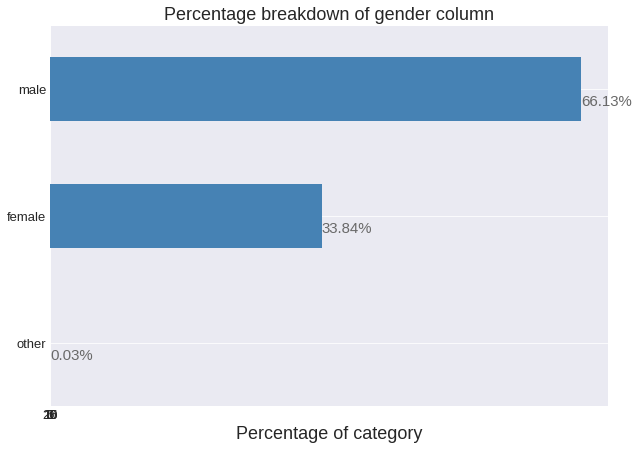

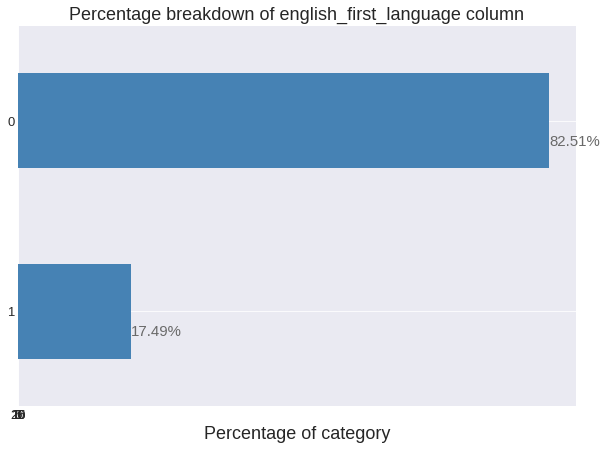

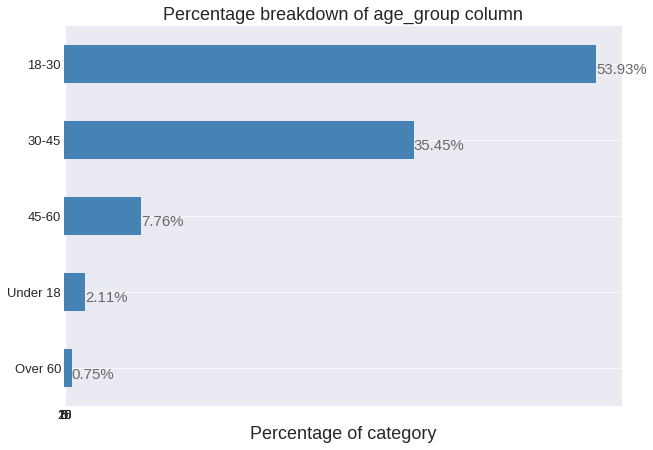

In [74]:
cols = ['education', 'gender', 'english_first_language', 'age_group']

for col in cols:
  plot_frequency(toxic, col, 'steelblue')
  figname = 'toxicity_'+col+'.png'
  plt.savefig(figname)

Here we can see the following trends:
- A majority of the reviewers are male (66 percent)
- A majorit of the reviewers are aged 18 - 45 (89 percent) 
- A significant proportion of the reviewers have only 'some' or 'high school' 
education (around 30 percent) and those reviews may not be accurately labelled. 

We can also investigate the distribution of demographics in the aggression dataset in the same way. 
These can potentially cause some problems with how the reviews occur in the data.

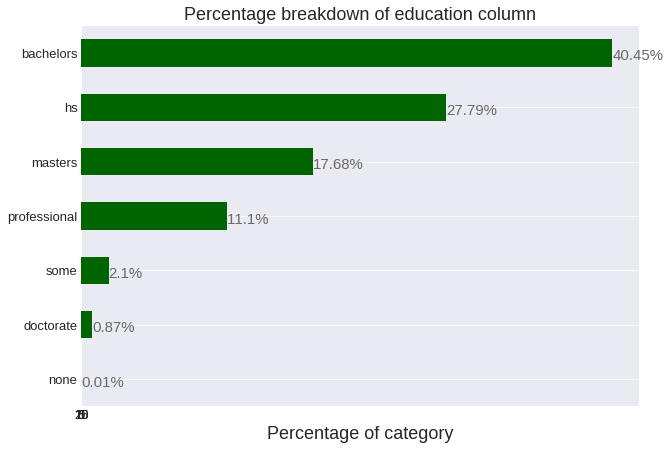

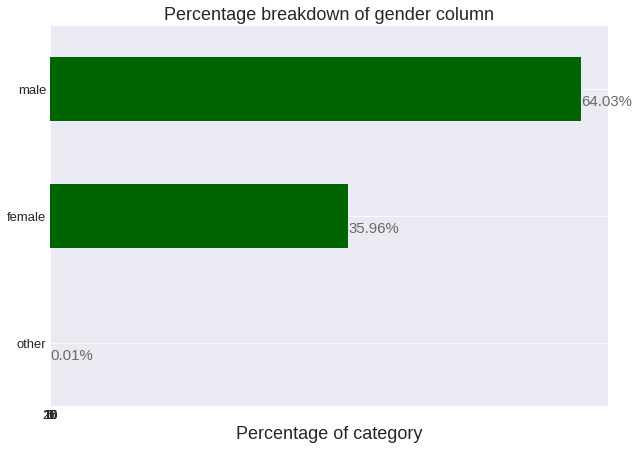

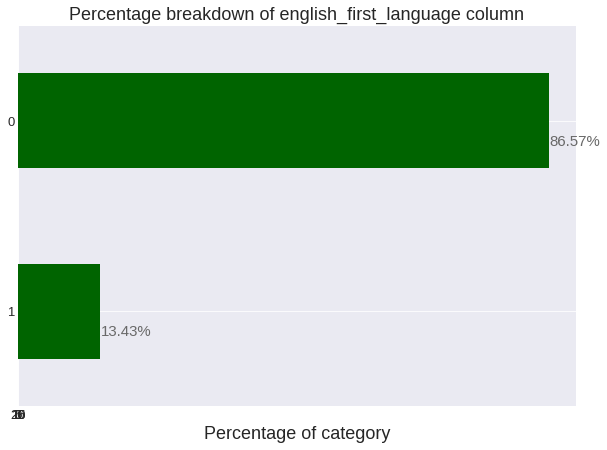

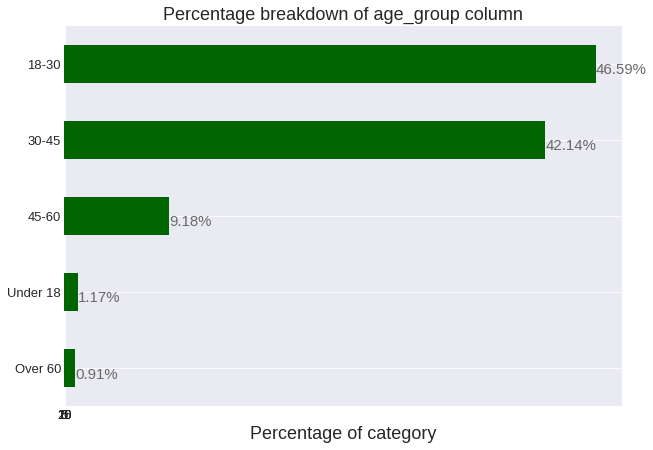

In [75]:
for col in cols:
  plot_frequency(aggression, col, 'darkgreen')
  figname = 'aggression'+col+'.png'
  plt.savefig(figname)

We can see that the demographics of the labellers or workers in the aggression dataset is very similar to the toxicity dataset. The question is, are these statistics representative of the general population?

We can refer to data from the US Census Bureau linked on Page 6 of the article linked [here](https://www.ncsl.org/Portals/1/Documents/nalfo/USDemographics.pdf)
 to accurately answer this question.

When it comes to population by age group, in the year 2000 and 2010, the 18-45 age group comprised approximately 40% and 37% of the general population respectively. This group is thus overrepresented in the worker samples above. 

We can again refer to the US Census Data to verify the distribution of gender in the years 2000 and 2010 in Table 1 of the article linked [here](https://www.census.gov/prod/cen2010/briefs/c2010br-03.pdf)

In 2000 and 2010, females comprised 50.9 and males comprised 49.1 % of the general population. This shows that women are underrepresented in the labellers sample above. 

Referring to the Figure 2 in the article on US Census Data linked [here](https://www2.census.gov/library/publications/2013/acs/acs-22/acs-22.pdf), we estimate that out of the population aged 5 and above, the general population consists of 20% of non-English first language speakers in both 2000 and 2010. Thus non-English speakers are slightly under-represented in the above. 


We can also analyze the educational attainment of those aged 18 and above in the Table 1 of the 2010 US Census Data linked [here](https://www.census.gov/data/tables/2010/demo/educational-attainment/cps-detailed-tables.html)

The education attainment table has been preprocessed by loading only relevant rows related to male and female education aged 18 years and above (which is the youngest age group for which counting begins).

In addition, the data has also been normalized by the row total to indicate percentage for easier comparison to the CrowdFlower dataset above. 


In [20]:
educ_data = pd.read_excel('table1-01.xls')
educ_data.columns = educ_data.iloc[4]
educ_data = educ_data[educ_data.index == 6]
educ_data.rename(columns={np.nan:'Male and female population'}, inplace=True)
#educ_data.set_index('Male and female population')

for col in educ_data.columns:
  if col != 'Male and female population' and col != 4:
    educ_data[col] = educ_data[col].astype('int64')

educ_data = educ_data.rename_axis(0, axis=1).reset_index(drop=True).\
        set_index('Male and female population')
total = 229240
educ_data = educ_data.apply(lambda row: row * 100 / total)

In [21]:
educ_data.head(1)

,Total,None,1st - 4th grade,5th - 6th grade,7th - 8th grade,9th grade,10th grade,11th grade /2,High school graduate,Some college no degree,"Associate's degree, occupational","Associate's degree, academic",Bachelor's degree,Master's degree,Professional degree,Doctoral degree
Male and female population,,,,,,,,,,,,,,,,
.18 years and over,100.0,0.370354,0.821846,1.508027,2.095184,1.750131,2.308061,4.859536,31.046938,19.348281,4.01457,4.596493,18.011255,6.699093,1.350986,1.218374


Thus in the age group 18 and above in the general population:
- 0.4 % have no education
- 13 % have some education (below high school level )
- 31 % are high school graduates
- 18 % have bachelors degrees — this number increases to 40 % who have gone to some college without a degree 
- 7 % have Masters degrees
- 1.2 % have Doctoral degrees

Meanwhile in the Crowdflower sample:
- 40 % have bachelors degrees
- 27 % have high school degrees
- 18 % have Masters degrees 
- 0.89 9% have doctorate degrees. 

This means that the Crowdflower sample over-represents those with bachelors degrees and Masters degrees while it under-represents those with 'some' education while it is unclear whether the 'some' represents below high school educational attainment.

There are consequences of having such critical differences from the general population. Even if the sample size is large enough, the fact that it under-represents some groups, particularly women, means that the analysis of whether comments are toxic or aggressive may not take the general population's mindsets into account.

# 2. Section 2: Labelling behavior for text data

It is possible that different groups are labelling data differently. We can investigate these behaviors by using category based heatmaps. 

First we see how much of each category( toxic and non-toxic) are present in the toxic dataset and similarly for the aggression dataset.

In [22]:
total_labels = len(toxic)
tox_labels = len(toxic[toxic.toxicity == 1])
n_tox_labels = len(toxic[toxic.toxicity == 0])

print("The fraction of comments labelled toxic are: {}".format(tox_labels * 100 / total_labels))
print("The fraction of comments labelled non-toxic are: {}".format(n_tox_labels * 100 / total_labels))

prop_tox = round(tox_labels / total_labels, 3)
prop_n_tox = round(n_tox_labels / total_labels, 3)


The fraction of comments labelled toxic are: 12.947581386794187
The fraction of comments labelled non-toxic are: 87.05241861320582


In [23]:
def plot_heatmaps(data, column, tox_val, ntox_val, ev_type):
  """
  Function to plot heatmaps of a category versus the toxicity / aggression
  label. First a crosstab is created that is normalized by row and then
  a heatmap is made.
  """
  # Creating crosstab
  crosstab = pd.crosstab(data[column], \
            [data[ev_type]]) 
  crosstab = crosstab.apply(lambda r: r/r.sum(), axis=1)
  # Separating by toxicity / aggression labels by reviewers
  ntox = crosstab[[0]]
  tox = crosstab[[1]] 
  
  fig, axs = plt.subplots(ncols=2)
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None,\
                      wspace=1, hspace=None)

  fig.tight_layout()
  # Plotting both events 1 and 0 as a heatmap side by side.
  sns.heatmap(tox , cmap='Blues', linewidths=0.1, center=tox_val, \
              ax= axs[0])
  label_ = 'Average {} label:{}, average non-{} label: {}'\
            .format(ev_type, tox_val, ev_type, ntox_val)
  axs[0].set_ylabel(label_)

  sns.heatmap(ntox , cmap='Greens', linewidths=0.1, center=ntox_val, \
              ax = axs[1])
  plt.suptitle('Heatmap of labelling {} vs non-{} by {}'.\
               format(ev_type, ev_type, column), y=1.10)

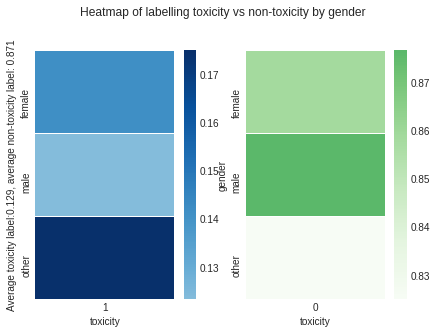

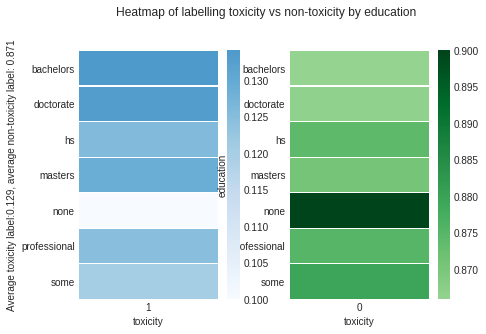

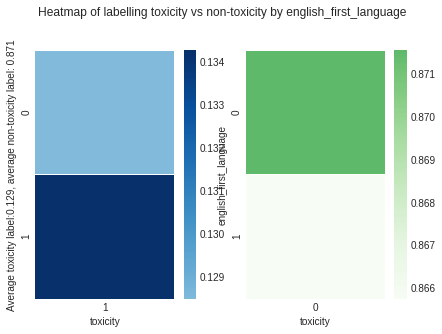

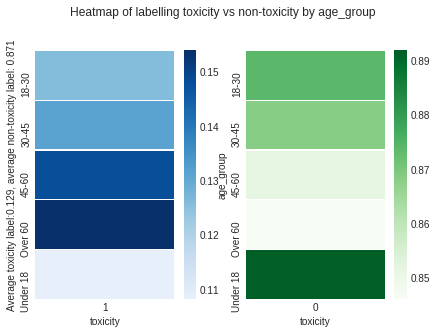

In [81]:
plot_cols = ['gender', 'education', 'english_first_language', 'age_group']

for col in plot_cols:
  figname = 'toxic_heatmap_'+col+'.png'
  plot_heatmaps(toxic, col, prop_tox, prop_n_tox, 'toxicity')
  plt.savefig(figname)

We can see that for gender:
- Males are more likely to vote as non-toxic than any other gender

For education:
- Those with 'doctorate', 'some' and 'none' may be more likely to vote as non-toxic (although their reasons for doing so may be very different). The converse is also true.

For age group:
- Those under 18 are more likely to label as non-toxic. 
- Those fromthe age group 40-60 are more likely to label as toxic. 

For english as first language:
- Those who do not have English as first language are more likely to label as non-toxic. 
- Those who have English as the first language are more likely to label as toxic.

We can also investigate similar trends in the aggression dataset.

In [25]:
a_total_labels = len(aggression)
agg_labels = len(aggression[aggression.aggression == 1])
n_agg_labels = len(aggression[aggression.aggression == 0])

print("The fraction of comments labelled aggressive are: {}".format(agg_labels * 100 / a_total_labels))
print("The fraction of comments labelled non-aggressive are: {}".format(n_agg_labels * 100 / a_total_labels))

prop_agg = round(agg_labels / a_total_labels, 3)
prop_n_agg = round(n_agg_labels / a_total_labels, 3)


The fraction of comments labelled aggressive are: 17.34561583077448
The fraction of comments labelled non-aggressive are: 82.65438416922552


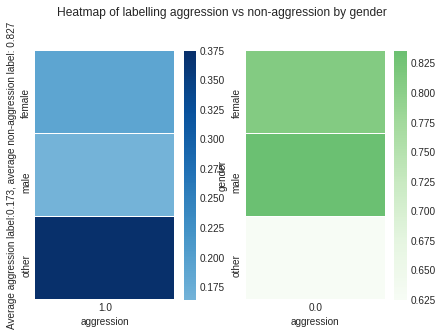

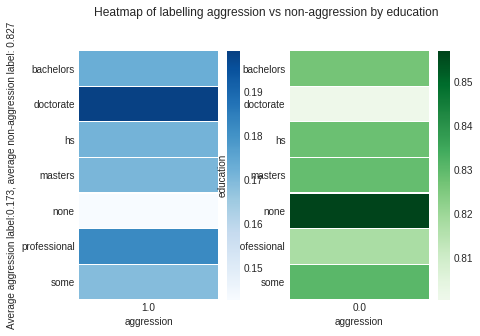

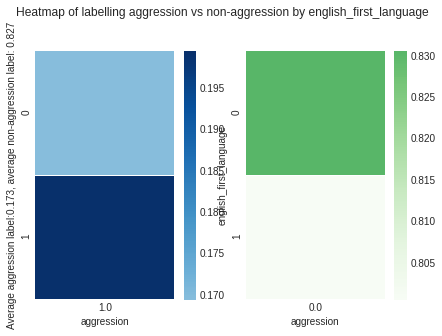

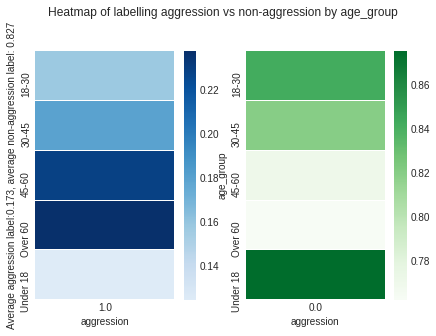

In [82]:
for col in plot_cols:
  figname = 'aggression_heatmap_'+col+'.png'
  plot_heatmaps(aggression, col, prop_agg, prop_n_agg, 'aggression')
  plt.savefig(figname)

In the aggression dataset:
1. Gender: Those who have self-identified as 'other' are more likely to label as aggressive.

2. Education: Those who have 'none' as their education are more likely to label as non-aggressive than aggressive.

3. First language: Those who have English as their first language are more likely to label as 
non-aggressive than aggressive. 

4. Age group: Those who are in the age group 45 and above are more likely to label as aggressive.

# 3. Section 3: Disagreements in labelling

For identifying the source of diverging labels, we need to group the toxicity and aggression datasets by the review id and have each row represent a list of attributes. 


In [27]:
def create_grouped_dataset(data):
  """
  Function to create a grouped dataset that aggregates every attribute 
  associated with an ID to a list form so that review ID can be a key to 
  the dataset but no data is lost. 
  """
  ungrouped = data.copy()
  event_type = None
  score_col = None

  if 'toxicity' in data.columns:
    print("Toxic ")
    event_type='toxicity'
    score_col = 'toxicity_score'
  else:
    print("Aggression")
    event_type= 'aggression'
    score_col = 'aggression_score'

  # Generating datasets that group attributes by review into a list.
  comments_multiple = ungrouped.groupby('rev_id').agg({'comment':lambda x: list(x)}).reset_index()
  years_multiple = ungrouped.groupby('rev_id').agg({'year':lambda x: list(x)}).reset_index()
  loggged_multiple =  ungrouped.groupby('rev_id').agg({'logged_in':lambda x: list(x)}).reset_index()
  event_multiple = ungrouped.groupby('rev_id').agg({event_type:lambda x: list(x)}).reset_index()
  event_multiple_score = ungrouped.groupby('rev_id').agg({score_col:lambda x: list(x)}).reset_index()
  gender_multiple =  ungrouped.groupby('rev_id').agg({'gender':lambda x: list(x)}).reset_index()
  english_multiple = ungrouped.groupby('rev_id').agg({'english_first_language':lambda x: list(x)}).reset_index()
  age_multiple = ungrouped.groupby('rev_id').agg({'age_group':lambda x: list(x)}).reset_index()
  educ_multiple = ungrouped.groupby('rev_id').agg({'education':lambda x: list(x)}).reset_index()


  # Combining these datasets into one
  COL = 'rev_id'
  how = 'inner'
  one = comments_multiple.merge(years_multiple, how=how, on=COL)
  two = one.merge(loggged_multiple, how=how, on=COL)
  three = two.merge(event_multiple, how=how, on=COL)
  four = three.merge(event_multiple_score, how=how, on=COL)
  five = four.merge(gender_multiple, how=how, on=COL)
  six = five.merge(english_multiple, how=how, on=COL)
  seven = six.merge(age_multiple, how=how, on=COL)
  eight = seven.merge(educ_multiple, how=how, on=COL)
  multiple = eight

  # Returning the final dataset.
  return multiple

In [28]:
toxic_m = create_grouped_dataset(toxic)
agg_m = create_grouped_dataset(aggression)

Toxic 
Aggression


In [29]:
toxic_m.head(1)

,rev_id,comment,year,logged_in,toxicity,toxicity_score,gender,english_first_language,age_group,education
0,2232.0,[This:NEWLINE_TOKEN:One can make an analogy in...,"[2002.0, 2002.0, 2002.0, 2002.0, 2002.0, 2002....","[True, True, True, True, True, True, True, Tru...","[0, 0, 0, 0, 0, 0, 0, 0, 1]","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, -1.0]","[female, male, female, female, female, male, m...","[0, 1, 0, 0, 1, 0, 0, 0, 0]","[30-45, 18-30, 18-30, 30-45, 45-60, 18-30, 18-...","[bachelors, hs, bachelors, bachelors, hs, bach..."


Once we have these grouped data, we can figure out what it is that makes some reviews more likely to diverge and others not so much. 

Above, the structure of the list aggregated data is visible.

We also create a function that tells us if a comment is associated with diverging labels that we will apply to both the datasets.

In [61]:
def if_diverging(list_input):
  """
  Function to find whether a comment faces diverging reviews by analyzing the label. 
  If items in the label are not all 0 or not all 1, then it is diverging.
  """
  arr = np.array(list_input)
  is_diverging = None
  if np.mean(arr) == 0 or np.mean(arr) == 1:
    is_diverging = 0
  else:
    is_diverging = 1
  return is_diverging

agg_m['is_diverging'] = agg_m['aggression'].apply(if_diverging)
toxic_m['is_diverging'] = toxic_m['toxicity'].apply(if_diverging)

print("The proportion of comments in aggression with diverging labels is : {}"\
      .format(sum(agg_m['is_diverging']) * 100/ len(agg_m)))

print("\n")

print("The proportion of comments in toxic with diverging labels is : {}"\
      .format(sum(toxic_m['is_diverging']) * 100/ len(toxic_m)))


The proportion of comments in aggression with diverging labels is : 40.00100669451855


The proportion of comments in toxic with diverging labels is : 37.131142448903525


Thus it seems like there are about 40% and 37% diverging labels in aggression and toxicity.

 We can further subdivide these datasets based on diverging and non-diverging and create a Counter variable that can keep track of how many items from each category exist.

In [31]:
from collections import Counter
toxic_div = toxic_m[toxic_m.is_diverging == 0]
toxic_n_div = toxic_m[toxic_m.is_diverging == 1]

agg_div = agg_m[agg_m.is_diverging == 0]
agg_n_div = agg_m[agg_m.is_diverging == 1]


For every column, we add to two dictionaries (one for diverging and one for non-diverging). 

For example, if an instance of the column variable Gender is listed as [Male, Female, Female] , we append these items to their respective keys in the dictionaries based on whether they are diverging or non-diverging.

Then we can create a counter variable that counts occurences in each category 

In [35]:
# Columns to iterate over
COUNT_COLS = ['toxicity', 'gender', 'english_first_language', 'year', \
              'logged_in', 'age_group', 'education']

from collections import defaultdict

occ_div = defaultdict(list)
occ_n_div = defaultdict(list)

# Appending to diverging data dictionary
for idx, row in toxic_div.iterrows():
  for col in COUNT_COLS:
    col_data = row[col]
    occ_div[col].extend(col_data)

# Appending to non-diverging data dictionary

for idx, row in toxic_n_div.iterrows():
  for col in COUNT_COLS:
    col_data = row[col]
    occ_n_div[col].extend(col_data)

In [38]:
occ_div['gender'][:10]

['male',
 'male',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male']

We can thus iterate over these two dictionaries and create a combined dataset that contains the amount diverging and non-diverging by each column. Note we could not achieve this with a simple crosstab function because of the aggregated nature of the new datasets.

AttributeError: ignored

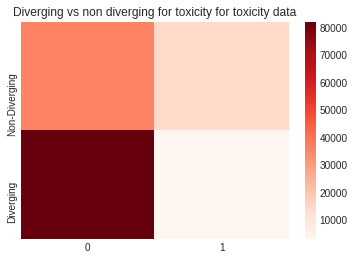

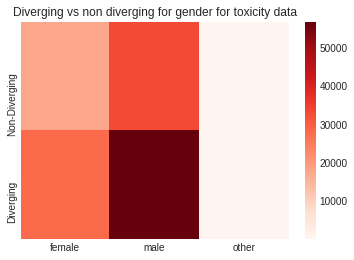

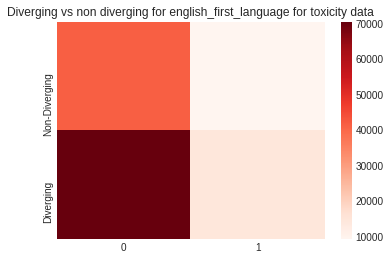

In [90]:
#Finding number of categories in diverging and non-diverging data.
for key in occ_div.keys():
  non_div_data = Counter(occ_n_div[key])
  df_n_div = pd.DataFrame(non_div_data, index=['Non-Diverging'])
  div_data = Counter(occ_div[key])
  df_div = pd.DataFrame(div_data, index=['Diverging'])
  comb_data = pd.concat([df_n_div, df_div])
  fig, ax = plt.subplots()
  sns.heatmap(comb_data, cmap='Reds')
  figname = 'toxicity_diverging_'+key+'heatmap.png'
  plt.title('Diverging vs non diverging for {} for toxicity data'.format(key))
  plt.savefig(figname)


We can see the following for patterns of diverge and non-divergence in the toxicity data:
Here, we can see some variation in the features for diverging vs. non-diverging data.
1. In general, there are more diverging labels among both _genders_ than non-diverging. 
2. There are more diverging labels across all first _languages_ than non-diverging. 
3. From the _years_ 2001 - 2005 there are equal amount of diverging and non-diverging. The same is true for 2013 on. However, in the intermediary period, the diverging labels are more. It is possible something happened during these years that did not happen otherwise. 
4. When users were _logged in_, there were more diverging than non-diverging labels. When they were not logged in , diverging vs. non-diverging labels remained the same. 
5. For the _age group_ 45 and above, the amounts of diverging vs. non-diverging labels are the same, and similarly for those aged 18 and under. For other age groups ranging from 18-45 there are more diverging than non-diverging labels. 
6. For all _education levels_ except at the doctorate level, the diverging labels are more than non-diverging labels.


# 4. Section 4: Words associated with labelling behavior

One simple way we can take a look at the words that are present in the most heavily rated toxic and aggressive labels in both these datasets. For this purpose, we can make a function to find reviews that have been largely voted as toxic or aggressive and plot their wordclouds after some string preprocessing.

In [58]:
def is_overwhelmingly_negative(list_input):
  """
  Function to categorize reviews based on whether 60% or more reviewers labelled it 
  as toxic or aggressive. 
  """
  arr = np.array(list_input)
  mean = np.mean(arr)
  is_negative = None
  if mean >= 0.6:
    is_negative = 1
  else:
    is_negative = 0
  return is_negative

Here we are finding the IDs of reviews that are almost certainly negative (toxic or aggressive). We will use these IDs to index the original toxicity and aggression data. 

In [41]:
toxic_m['very_toxic'] = toxic_m['toxicity'].apply(is_overwhelmingly_negative)
agg_m['very_aggressive'] = agg_m['aggression'].apply(is_overwhelmingly_negative)

We can see that out of the full reviews, only about 15,000 are very negative (been labelled as toxic / aggressive by more than 60% of reviewers) in both datasets.

In [43]:
toxic_m.shape, len(toxic_m[toxic_m.very_toxic == 1])

((16097, 12), 1156)

In [44]:
agg_m.shape, len(agg_m[agg_m.very_aggressive == 1])

((19867, 12), 2240)

We can see that there are a lot of reviews that can be characterized as extremely aggressive and toxic. Because the data is large and will take a long time to generate a word cloud, we will only select a sample of unique reviews that are very negative

In [45]:
tox_rev_ids = toxic_m[toxic_m.very_toxic == 1]['rev_id'].unique()[0:200]
agg_rev_ids = agg_m[agg_m.very_aggressive == 1]['rev_id'].unique()[0:200]

We will use these review IDs to link to the string comments in the original data (which is not aggregated by list) and drop duplicates.

In [46]:
sample_tox = toxic[toxic.rev_id.isin(tox_rev_ids)][['comment']]
sample_tox.drop_duplicates(inplace=True)
sample_agg = aggression[aggression.rev_id.isin(agg_rev_ids)][['comment']]
sample_agg.drop_duplicates(inplace=True)


In [47]:
sample_agg.head()

,comment
18,"Next, maybe you could work on being less cond..."
411,`NEWLINE_TOKENNEWLINE_TOKEN:Click on my ``Anno...
476,Iraq is not good ===NEWLINE_TOKENNEWLINE_TO...
975,`NEWLINE_TOKENNEWLINE_TOKENBuddha - ``Some sug...
1689,NEWLINE_TOKENNEWLINE_TOKEN____NEWLINE_TOKENfuc...


We will now create a function to generate a wordcloud. The function has two parts:
1. To iterate overy every string in the sample data and preprocess them so its suitable as input to the word cloud.
2. Generate the wordcloud 

In [54]:
import nltk
#nltk.download('punkt')

In [55]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize


def generate_wordcloud(col_data):
  """
  Function to preprocess strings in data column and remove punctuations 
  so that a wordcloud can be generated
  """
  combined_list = []
  punct_list = ['=', ',', ':', "*", '/', "-", "/"]
  generic_words = ['object', 'dtype'] 

  # Cleaning the string
  for idx, row in col_data.iterrows():
    string = row.iloc[0]
    string = string.replace('NEWLINE_TOKEN', '')
    #Removing unneeded words and punctuation
    string_clean = word_tokenize(str(string))
    string_clean = [word for word in string_clean if word.isalpha()]
    string_list = [word for word in string_clean if word not in generic_words]
    string_final = ' '.join(string_list)
    combined_list.append(string_final)

  # Creating final string
  final_string = " ".join(combined_list)
  # Plotting wordcloud.
  wordcloud = WordCloud(width=1500, height=800, background_color='white').generate(final_string)
  plt.figure(figsize=(15,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


Generating the wordcloud for the toxicity data

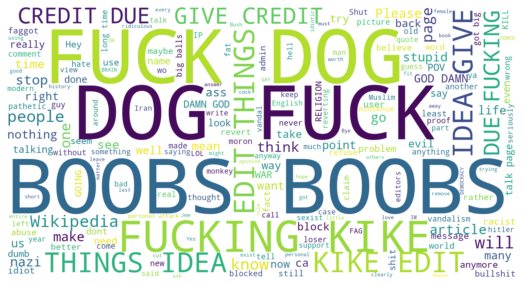

In [117]:
generate_wordcloud(sample_tox)
#plt.savefig('toxicity_wordcloud.png')

Generating the wordcloud for the aggression data

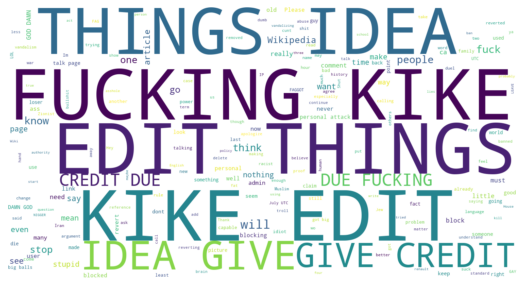

In [119]:
generate_wordcloud(sample_agg)
#plt.savefig('a`aggression_wordcloud.png')

We can see that while some words in these word clouds may be innocent, such as 'Wikipedia' and 'give credit', there are a number of inappropriate references to genitalia that can be toxic and a number of slurs and curses that can be interpreted as aggressive.

I agree that these comments are correctly labelled, in line with what is generally thought to be toxic / aggressive behavior. 

# 5. Section 5: General implications: 

It could be interesting to view more closely the biases held by these people, if additional data were available individualized to each user. It could show what their true motivations were for characterizing the data.

In addition, if samples were more representative of the general population and contained more representation of some doctorates etc., analyzing relationships between variables such as gender / education etc would also be interesting.

# 6. Section 6: Implications from Step 2

- **Which, if any, of these demo applications would you expect the Perspective API to perform poorly in? Why?**

I would expect the demo application that works with a comment filter that filters out the level of toxicity to fail. This is because beyond looking for certain words, it is hard to characterize what is toxic to degrees of severity (rather than a binary classification). For example the sentence 'I wish ill upon your person' semantically may not characterize as high in toxicity as it really is. 


- **Which, if any, of these demo applications would you expect the Perspective API—or any model trained on the Wikipedia Talk corpus—to perform well in? Why?**

I expect the comment timeline filter to perform well because once it has been identified as toxic or aggressive, characterizing it to view by time should be easy. 


- **What are some kinds of hostile speech that would be difficult to accurately detect using the approach used to train the Perspective API models?**

Hostile speech using codewords or coded language would be difficult to train with the Perspective API models. Hostile speech that is subtle instead of very clearly problematic would also be difficult to identify.